## Residence Charge Estimator 2022
### Problem Statement
- Lots of people migartes to new cities to make there professional and educational career and want to have residence not far away from there workplace and college.This Model will help them to figured out rent based on Locality they wants to acquire,model includes major cities like Mumbai, Pune, Delhi, Hyderabad, Kolkata, Bangalore, Chennai and Ahmedabad.

- When i was on college i have also faced this issue while hunting residence and due to lack of information of that particular area resulted me to pay ₹ 1500 extra for the property which we have acquired for rent. 

### Project Overview
- Designed a Machine Learning Regression Model which is focused on charge of residence

- Main aim of this estimator is to display residence charge based on Bathroom / House / Kitchen, Square Feet , Bathroom, Area type, Furnishing status of given City and its Locality. 

### Importing Required Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('rent.csv')

In [3]:
data.head()

,BHK,Area Type,area,Rent,Size,Furnishing Status,Bathroom,City
0,2,Apartment,Bodakdev,20000,1450,Furnished,2,Ahmedabad
1,1,Studio Apartment,CG Road,7350,210,Semi-Furnished,1,Ahmedabad
2,3,Apartment,Jodhpur,22000,1900,Unfurnished,3,Ahmedabad
3,2,Independent House,Sanand,13000,1285,Semi-Furnished,2,Ahmedabad
4,2,Independent House,Navrangpura,18000,1600,Furnished,2,Ahmedabad


In [4]:
data.tail()

,BHK,Area Type,area,Rent,Size,Furnishing Status,Bathroom,City
193006,1,Apartment,Chinchwad,13250,650,Semi-Furnished,1,Pune
193007,1,Studio Apartment,Wadgaon Sheri,7000,350,Unfurnished,1,Pune
193008,1,Apartment,Kothrud,8500,389,Semi-Furnished,1,Pune
193009,1,Apartment,Wakad,16500,670,Semi-Furnished,2,Pune
193010,2,Apartment,Alandi,12000,800,Unfurnished,2,Pune


In [5]:
data.shape

(193011, 8)

In [6]:
data.columns

Index(['BHK', 'Area Type', 'area', 'Rent', 'Size', 'Furnishing Status',
       'Bathroom', 'City'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   BHK                193011 non-null  int64 
 1   Area Type          193011 non-null  object
 2   area               193011 non-null  object
 3   Rent               193011 non-null  int64 
 4   Size               193011 non-null  int64 
 5   Furnishing Status  193011 non-null  object
 6   Bathroom           193011 non-null  int64 
 7   City               193011 non-null  object
dtypes: int64(4), object(4)
memory usage: 11.8+ MB


In [8]:
data.isnull().sum()

BHK                  0
Area Type            0
area                 0
Rent                 0
Size                 0
Furnishing Status    0
Bathroom             0
City                 0
dtype: int64

In [9]:
data.describe()

,BHK,Rent,Size,Bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [10]:
data['area'].value_counts()

Thane West                 4478
Chembur                    3549
Andheri East               3415
Bopal                      2933
Kharghar                   2614
                           ... 
Kuthambakkam                  1
Agaramthen                    1
Daighar Gaon                  1
Mettukuppam Kanchipuram       1
Aundh Gaon                    1
Name: area, Length: 4146, dtype: int64

In [11]:
area_count = data['area'].value_counts()

In [12]:
area_count_less = area_count[area_count <= 5]
area_count_less

Action Area II             5
GTB Nagar                  5
sriram nagar kondapur      5
Kollur                     5
Narayanpur                 5
                          ..
Kuthambakkam               1
Agaramthen                 1
Daighar Gaon               1
Mettukuppam Kanchipuram    1
Aundh Gaon                 1
Name: area, Length: 2517, dtype: int64

In [13]:
data['area'] = data['area'].apply(lambda x: 'other' if x in area_count_less else x)

In [14]:
data['area'].value_counts()

other                4901
Thane West           4478
Chembur              3549
Andheri East         3415
Bopal                2933
                     ... 
Koti                    6
Ambivali                6
Sector 21 Kamothe       6
South Extension         6
Bondel Road             6
Name: area, Length: 1630, dtype: int64

In [15]:
# Visualizing categorical variable
num_cols = data.select_dtypes('number')
cat_cols = data[['Area Type','City','Furnishing Status']]

## Data Visualization

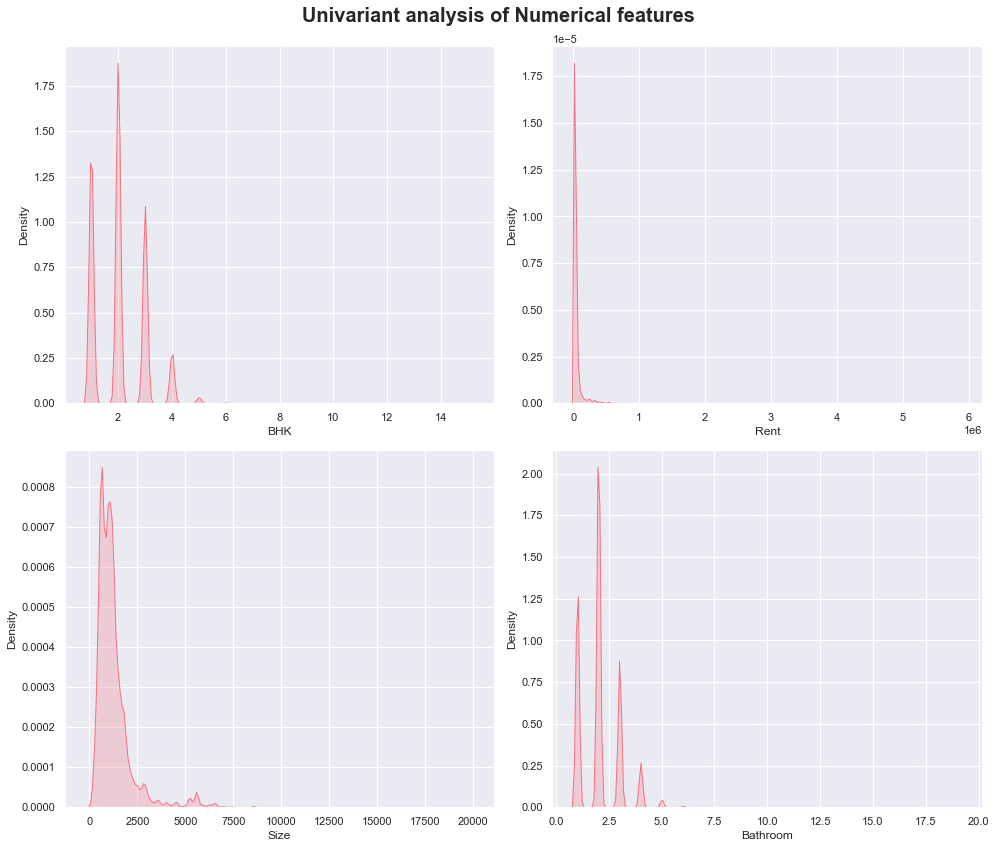

In [66]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
plt.figure(figsize = (14, 12))
sns.set(rc = {'figure.figsize':(8,10)})
plt.suptitle('Univariant analysis of Numerical features', fontsize = 20, fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = data[numeric_features[i]], shade = True, color = '#F67280')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Bar Plot for Number of House in Each City which is Available for Rent

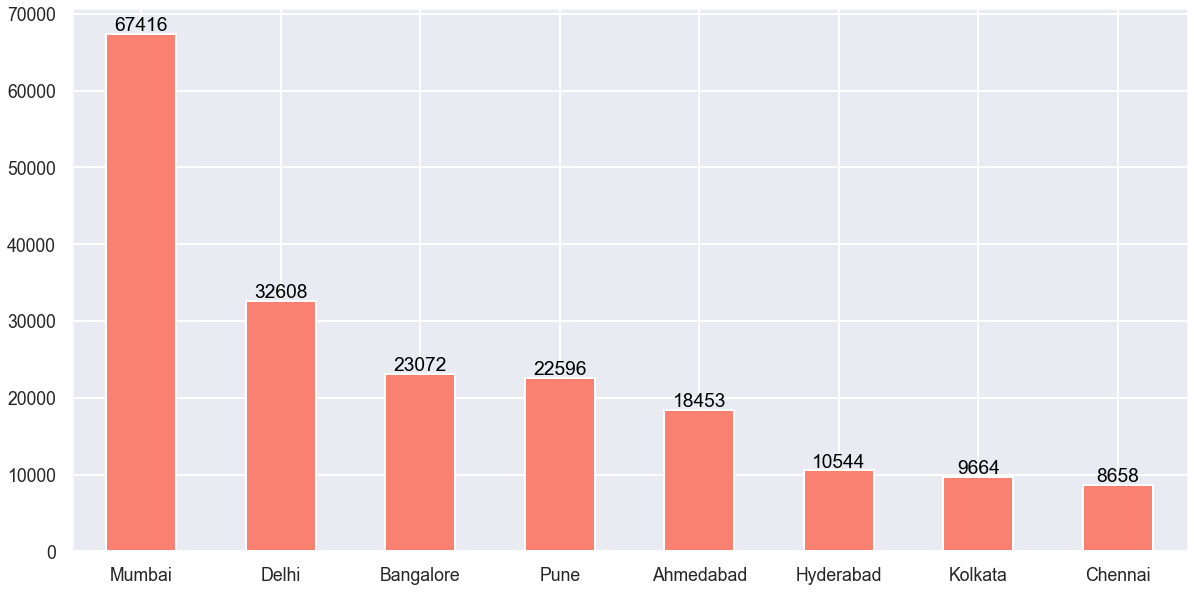

In [59]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 10))
ax = data["City"].value_counts().plot(kind = 'bar',
                                         color = "salmon",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

### Bar Plot on Different Types of Furnishing Status

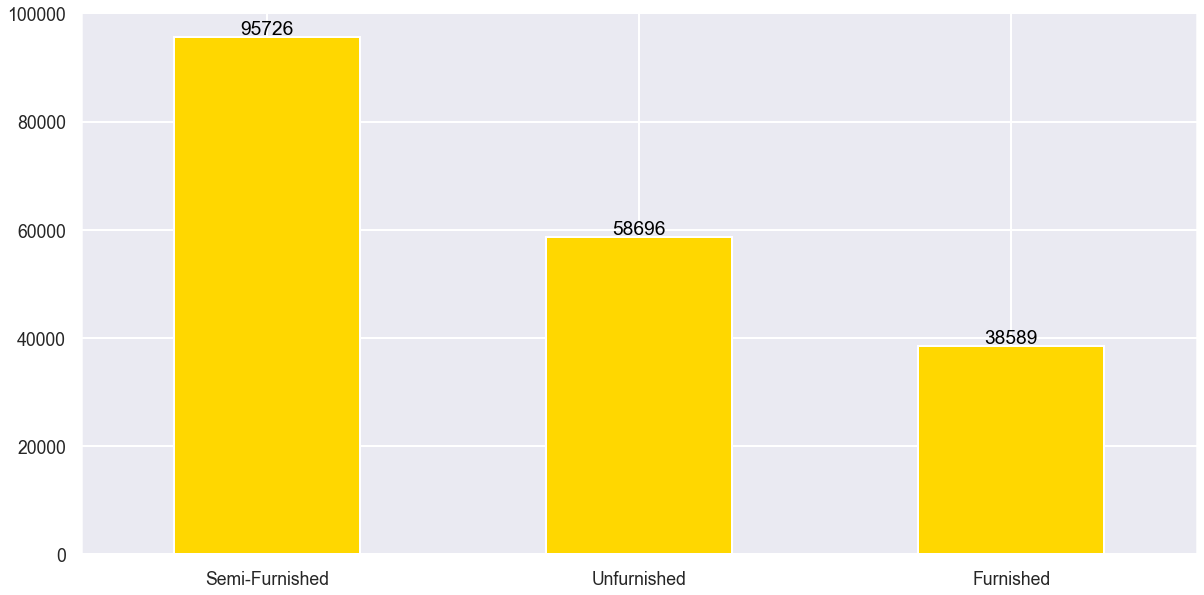

In [71]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 10))
ax = data["Furnishing Status"].value_counts().plot(kind = 'bar',
                                                      color = "Gold",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

### Bar Plot for Types Residence Available for Rent

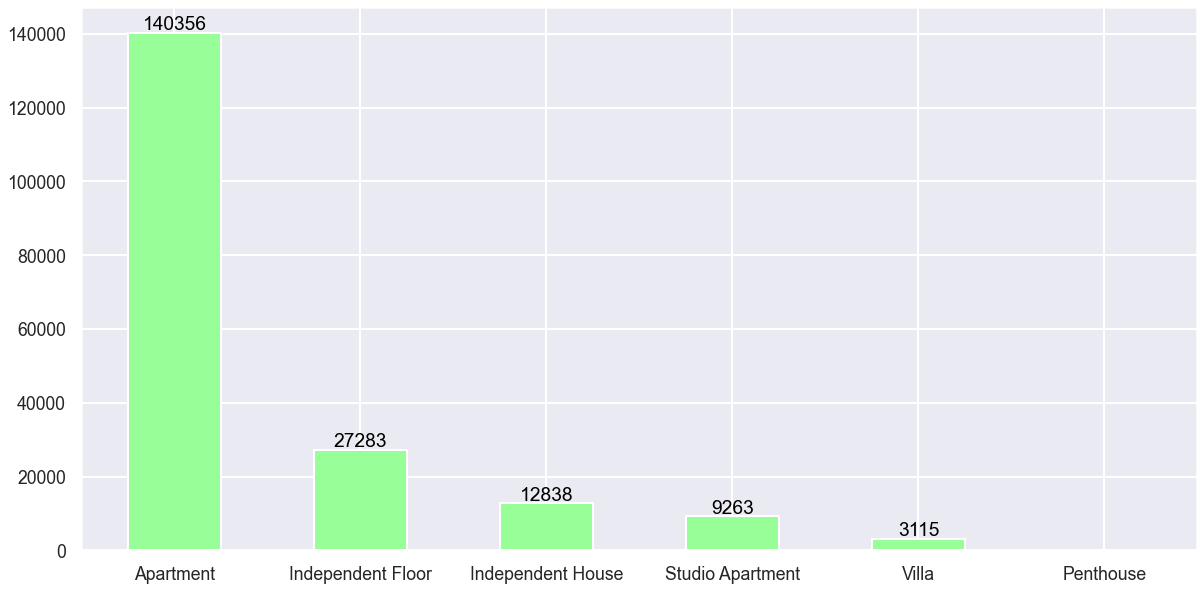

In [72]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 10))
ax = data["Area Type"].value_counts().plot(kind = 'bar', color = "#98FF98", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

### Pie Plot on Cities to check the distribution

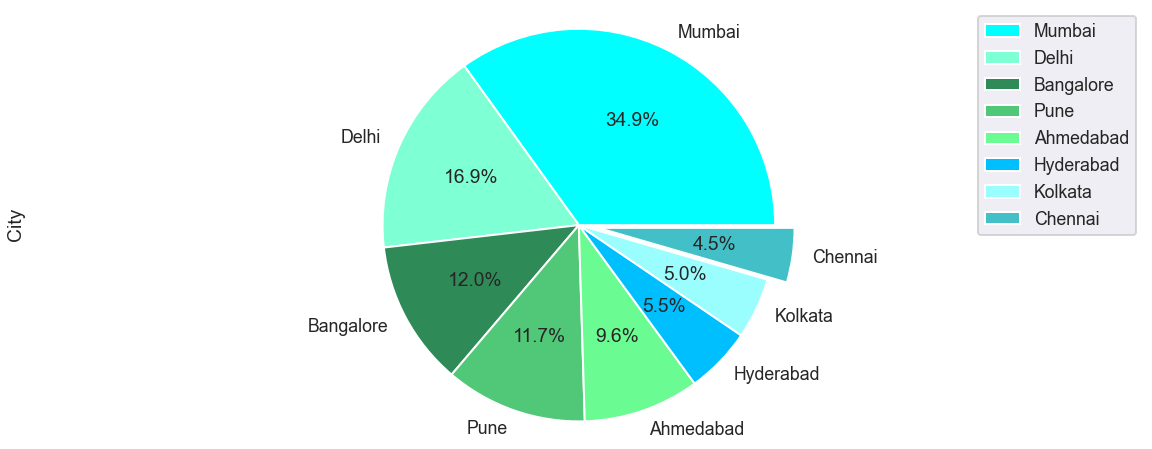

In [44]:
plt.figure(figsize = (20, 8))
counts = data["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0, 0, 0.1)
colors = ['#00FFFF', '#7FFFD4', '#2E8B57', '#50C878', '#6AFB92', '#00BFFF', '#9AFEFF', '#43BFC7']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### Distribution of different number of Bedroom / Hall / Kitchen

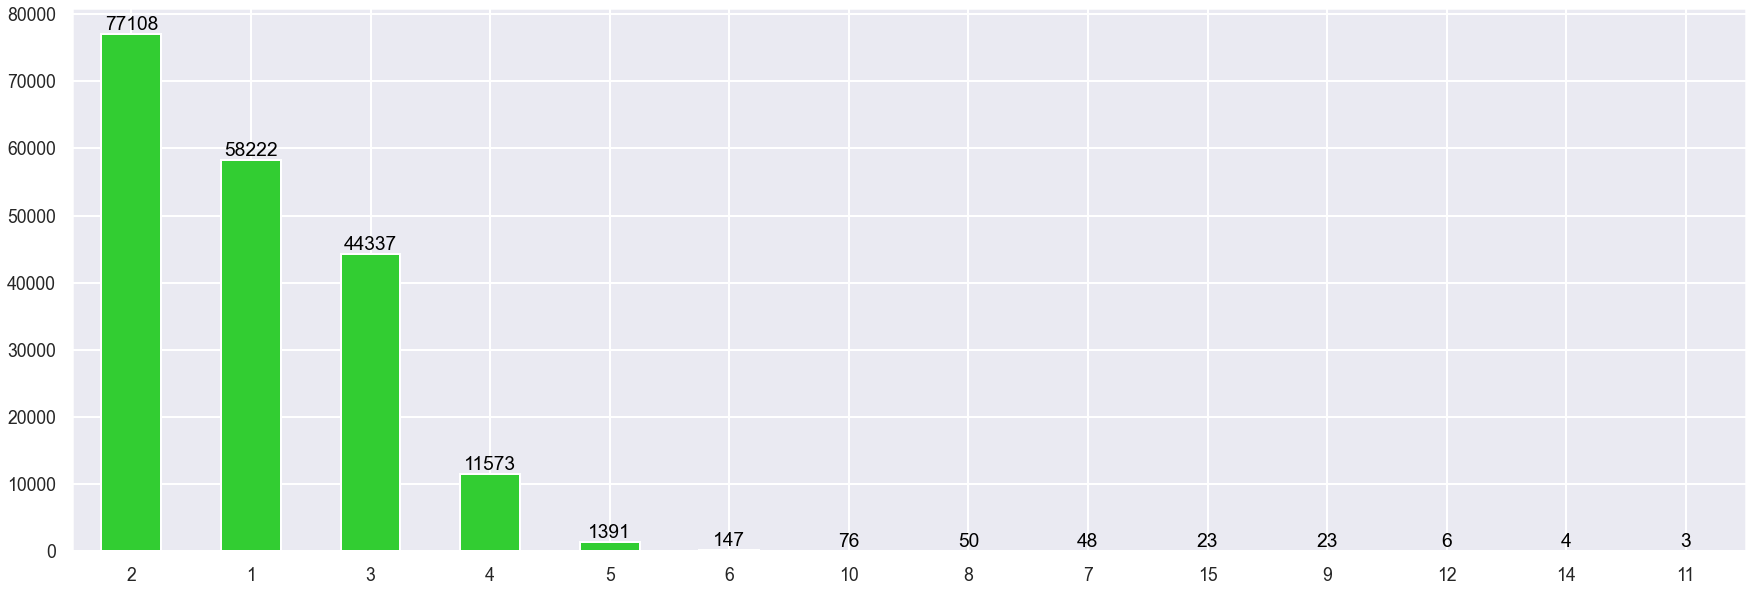

In [54]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = data["BHK"].value_counts().plot(kind = 'bar',
                                        color = "Limegreen",
                                        rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

### Distribution of different number of Bathrooms 

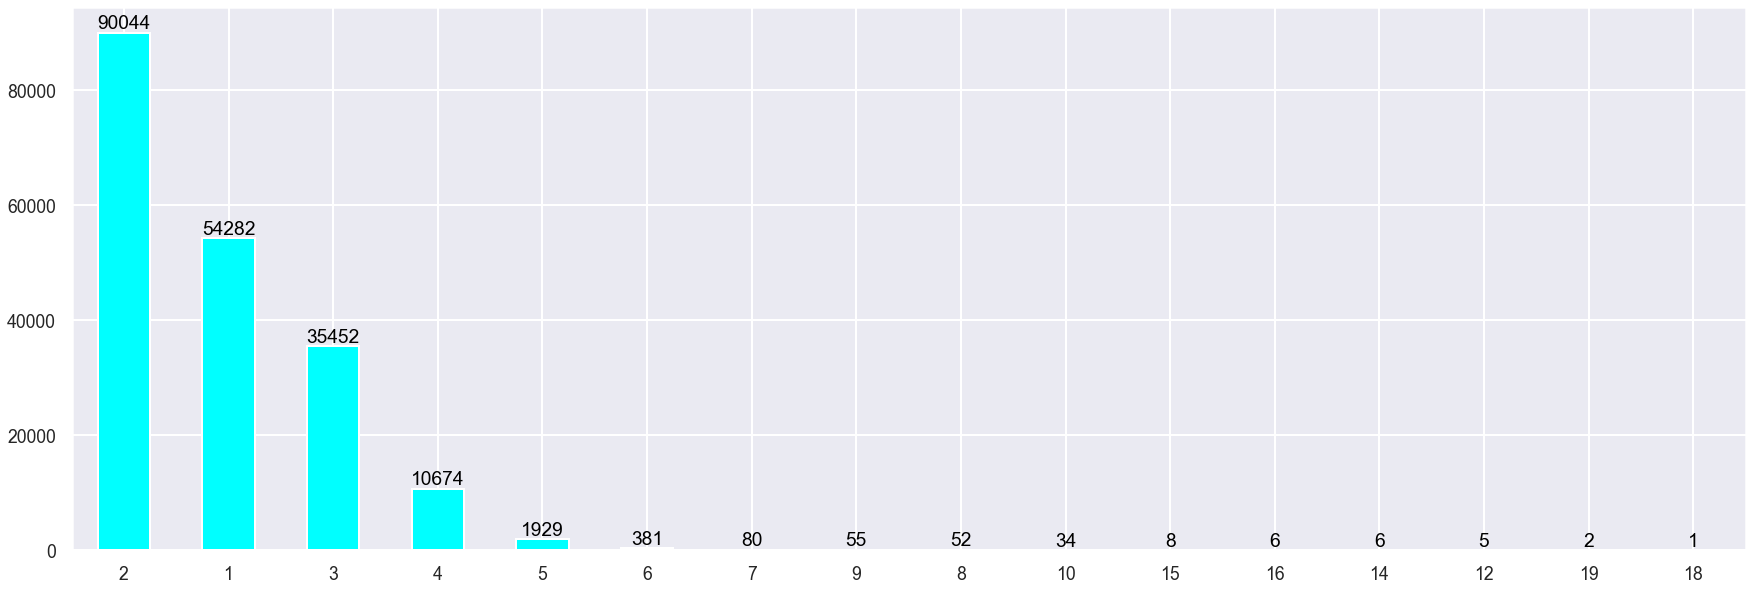

In [52]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (30, 10))
ax = data["Bathroom"].value_counts().plot(kind = 'bar',
                                             color = "Aqua",
                                             rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

### Scatter Plot on House Rents vs House Sizes

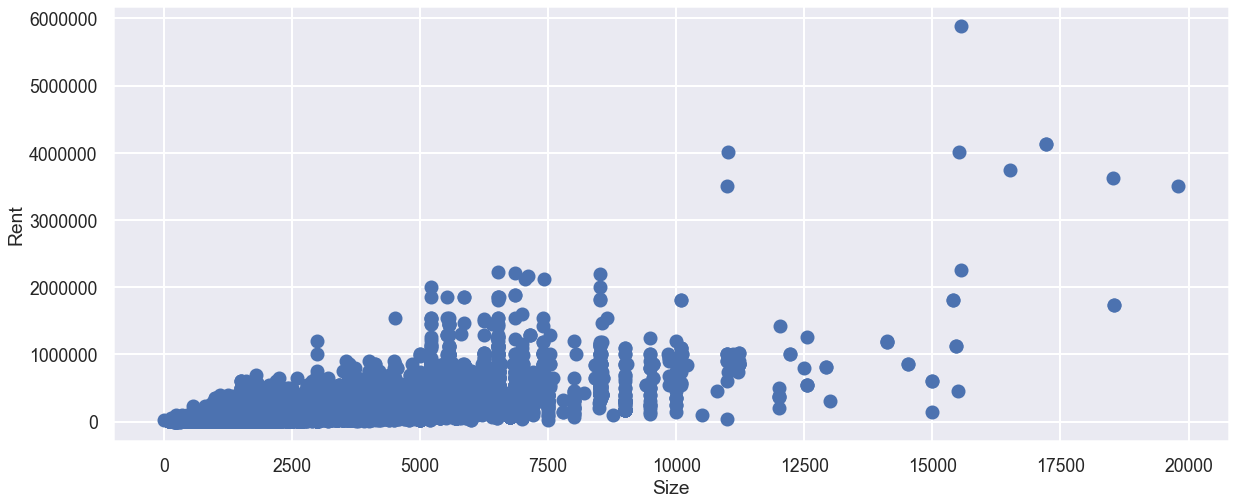

In [47]:
plt.figure(figsize = (20, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(data["Size"], data["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

### Relationship between House Rent vs House Sizes

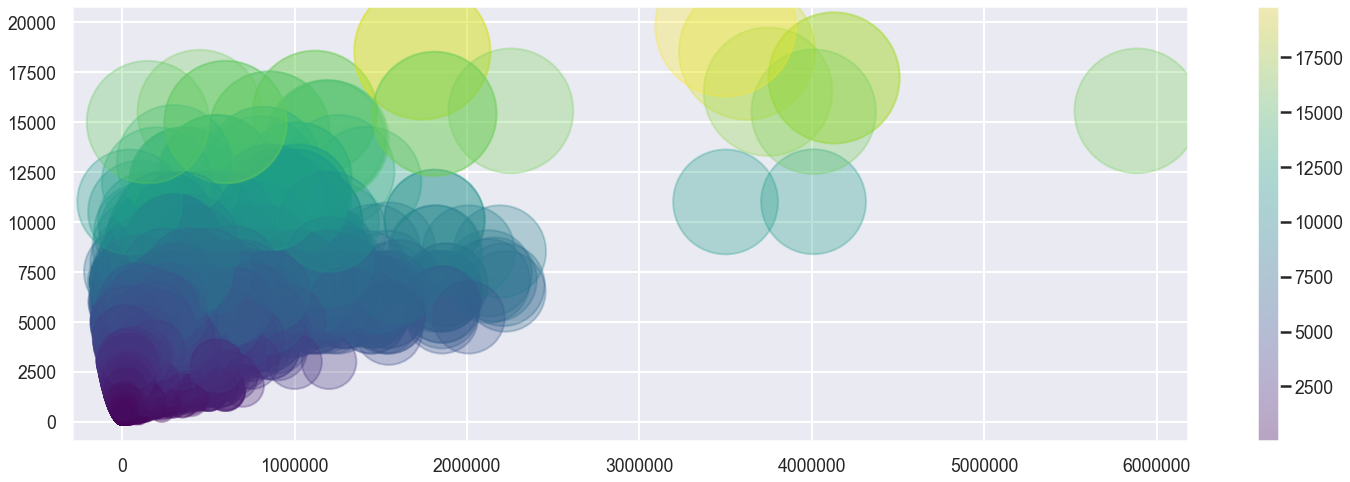

In [49]:
x = data["Rent"]
y = data["Size"]
colors = data["Size"]
sizes = data["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

### Word Cloud on Area

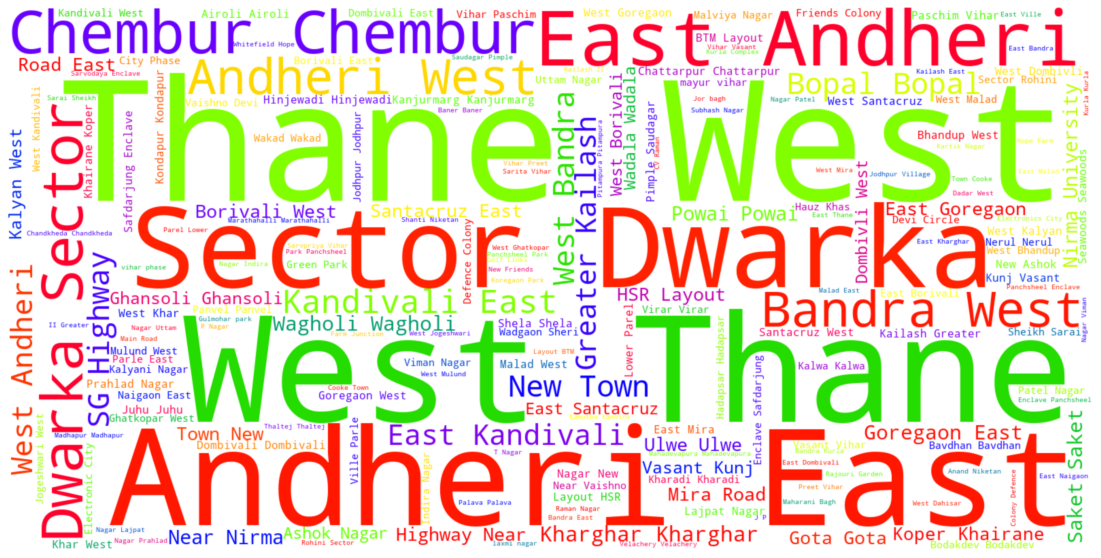

In [73]:
text = " ".join(Company for Company in data["area"])
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'prism',
                       background_color = "white").generate(text)
plt.figure(figsize = (30, 10))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

## Multi-variant Analysis

<Figure size 1440x1440 with 0 Axes>

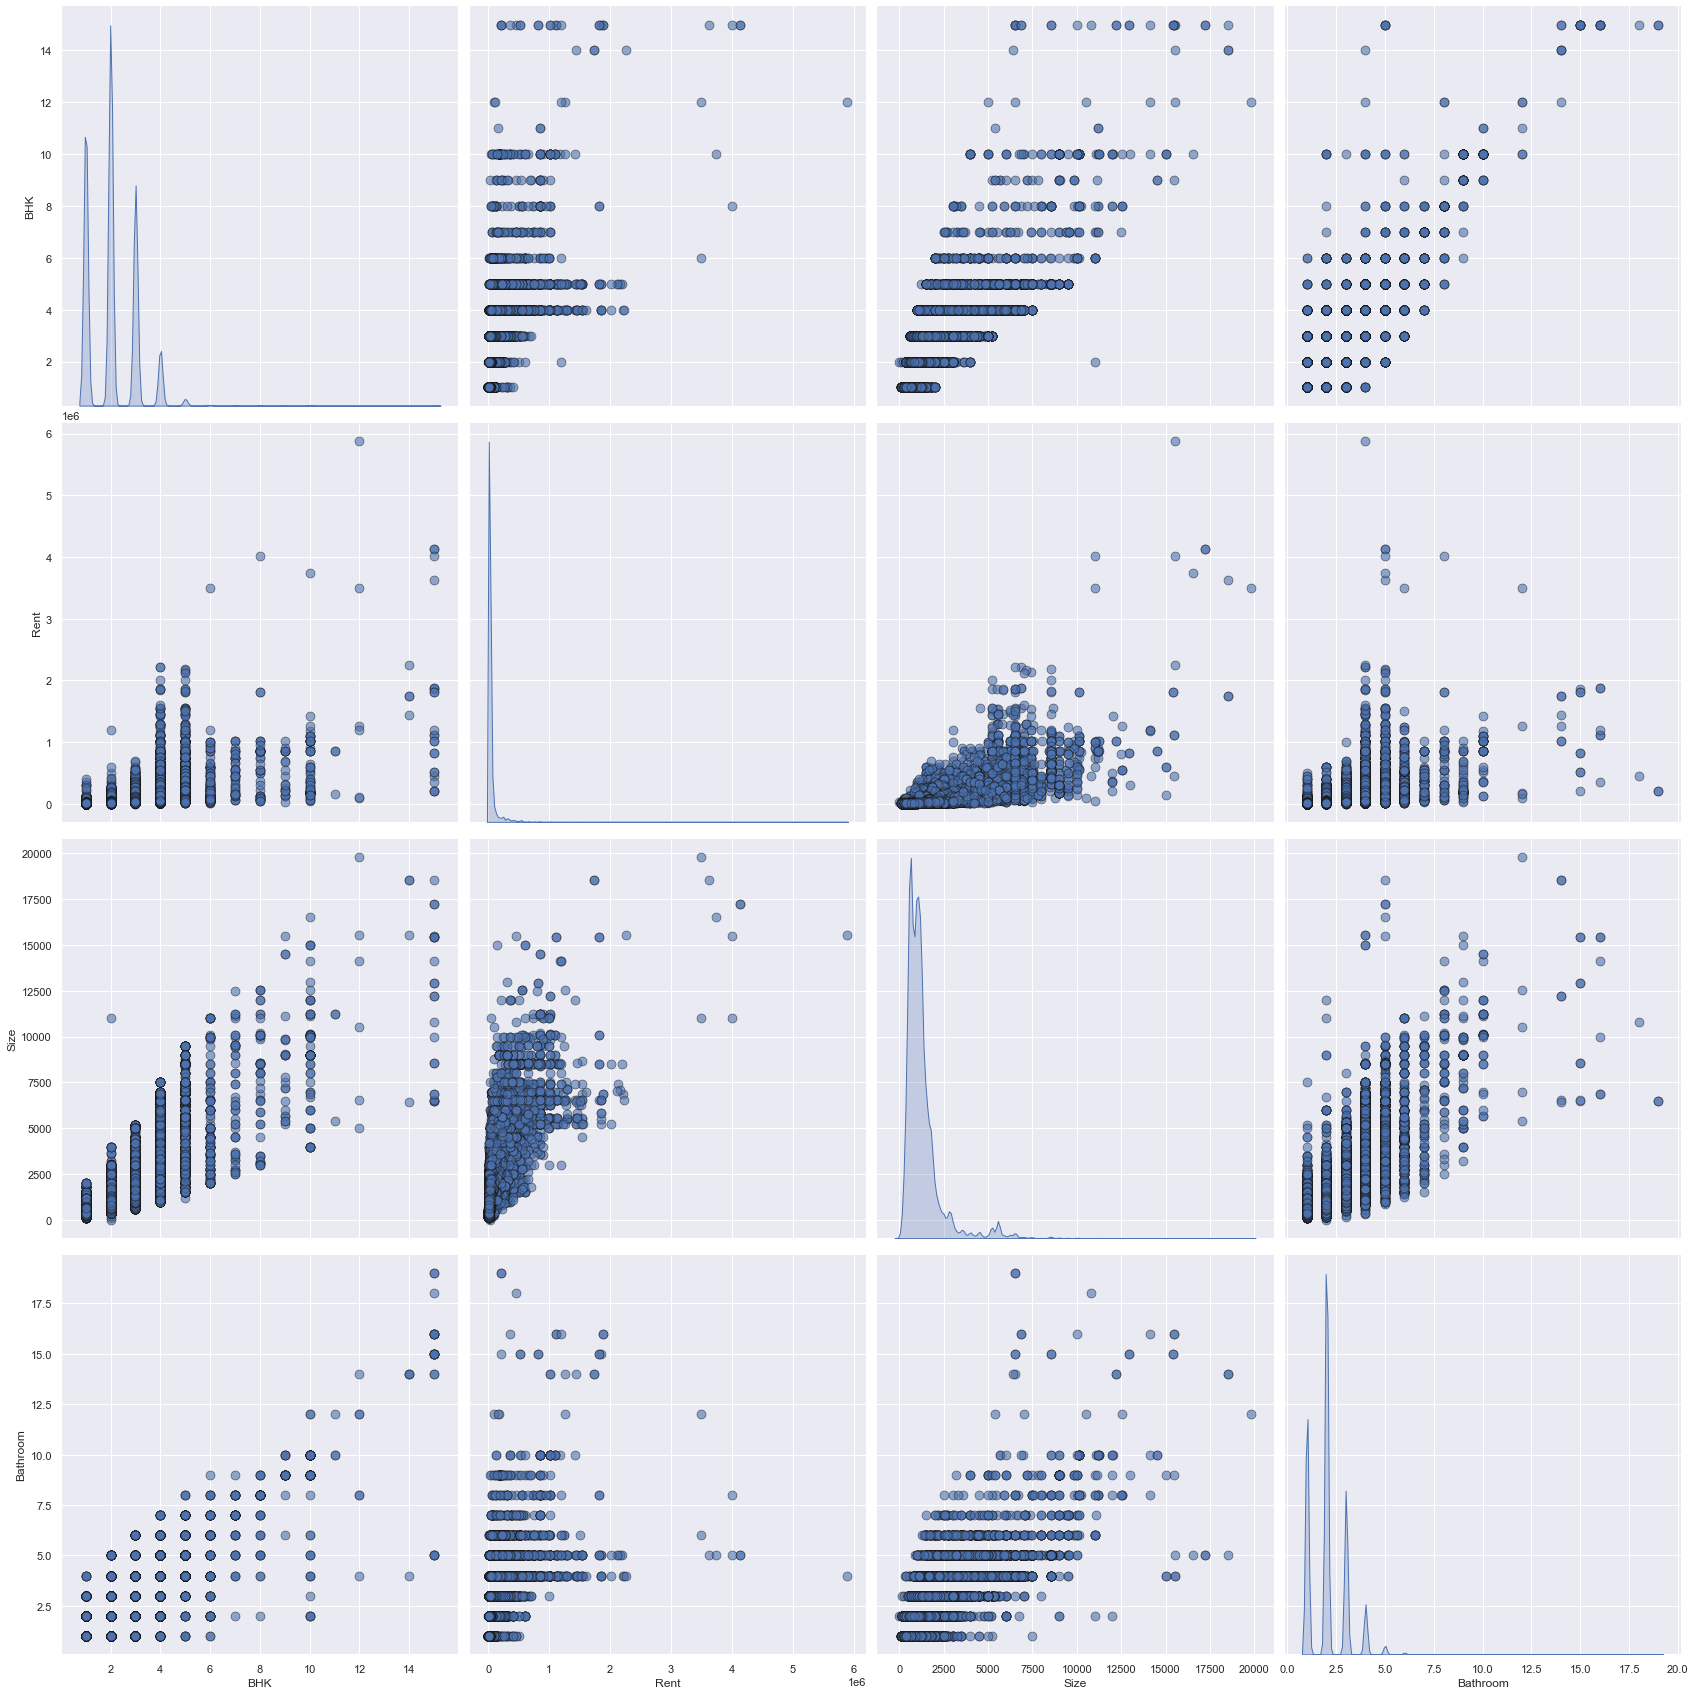

In [19]:
plt.figure(figsize = (20,20))
plt.suptitle('Multi variate analysis', fontsize = 20, fontweight = 'bold', alpha = 0.8)
sns.pairplot(data, diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's':80, 'edgecolor':'k'},
            size = 6)

<AxesSubplot:>

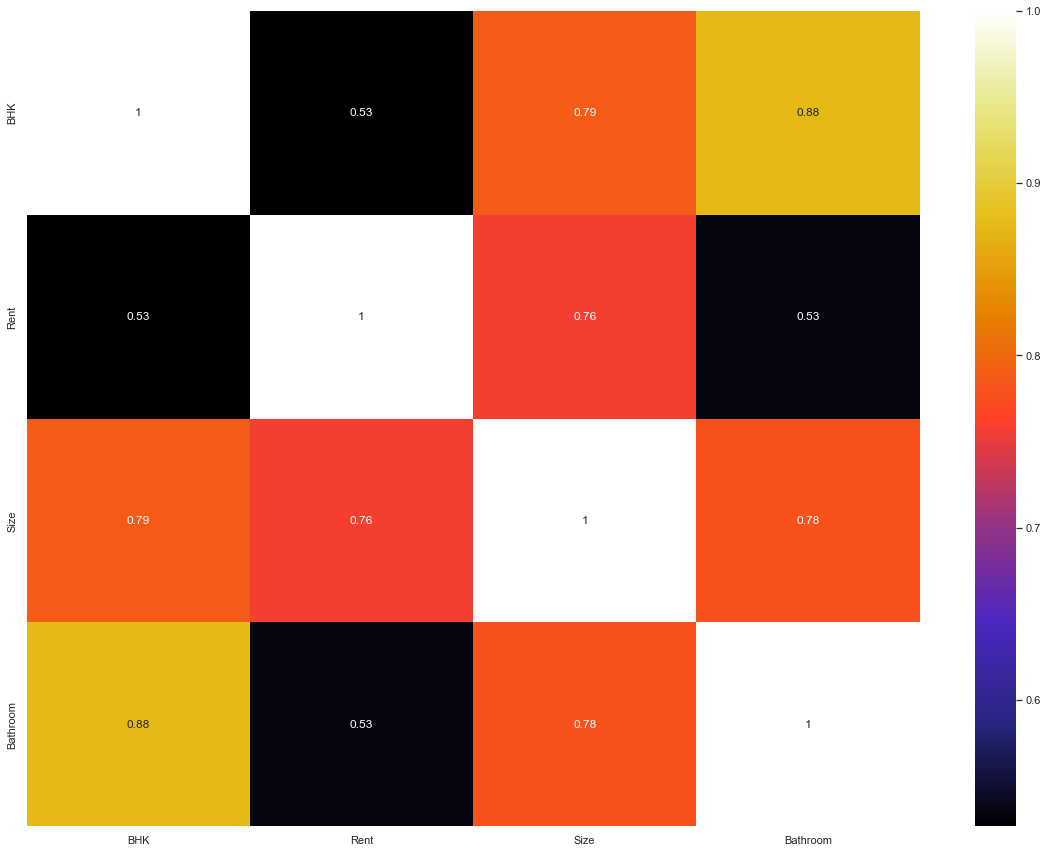

In [20]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), cmap = 'CMRmap', annot = True)

## Outliers Detection

<AxesSubplot:xlabel='BHK'>

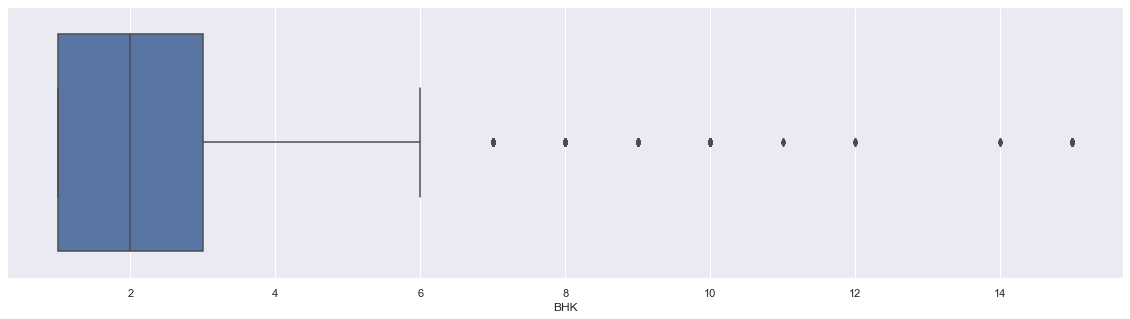

In [21]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['BHK'])

<AxesSubplot:xlabel='Rent'>

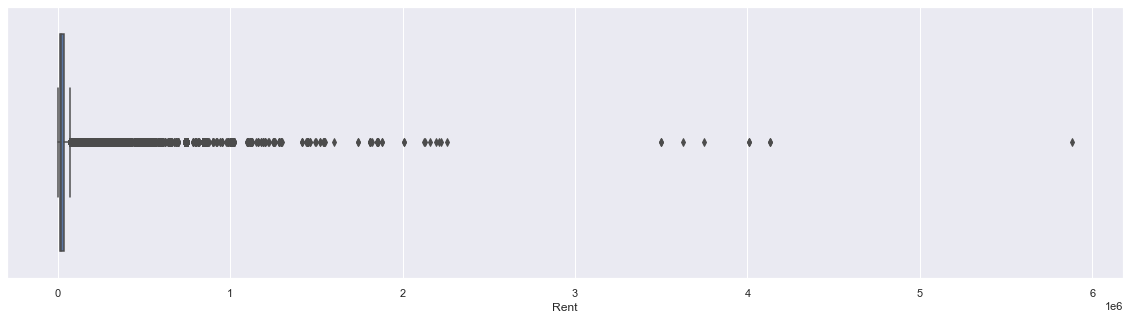

In [22]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Rent'])

<AxesSubplot:xlabel='Size'>

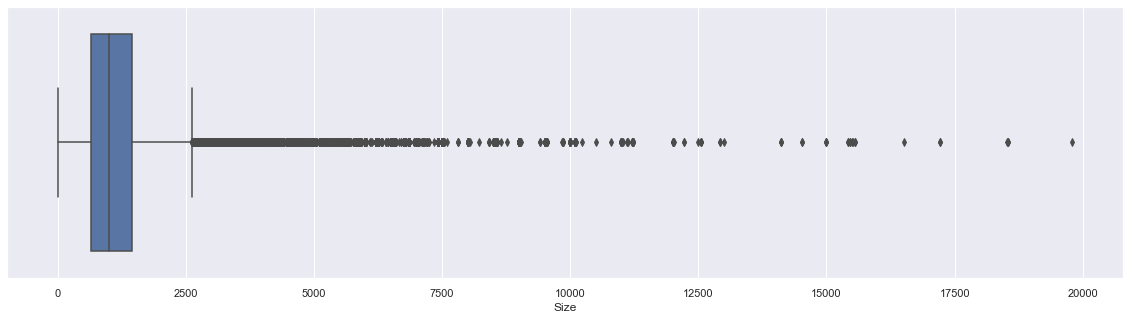

In [23]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Size'])

<AxesSubplot:xlabel='Bathroom'>

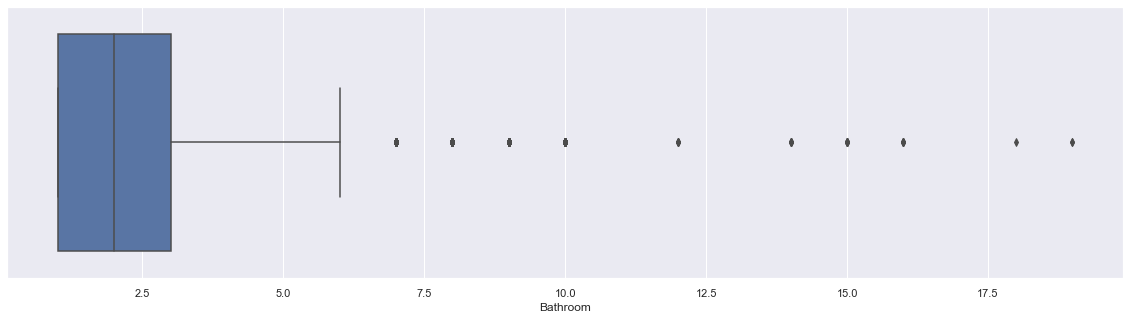

In [24]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Bathroom'])

## Removing Outliers

In [25]:
# dropping outliers
def outliers_imputation(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (IQR * 1.5)
    upper_fence = data[column].quantile(0.75) + (IQR * 1.5)
    print('IQR:', IQR)
    print(f'Lower Fence {column}:',lower_fence)
    print(f'Upper Fence {column}:',upper_fence)
    data.loc[data[column]  <= lower_fence,column] = lower_fence
    data.loc[data[column]  >= upper_fence,column] = upper_fence

In [26]:
columns = data.select_dtypes('number')

In [27]:
for col in columns:
    outliers_imputation(data, col)

IQR: 2.0
Lower Fence BHK: -2.0
Upper Fence BHK: 6.0
IQR: 23000.0
Lower Fence Rent: -21500.0
Upper Fence Rent: 70500.0
IQR: 790.0
Lower Fence Size: -535.0
Upper Fence Size: 2625.0
IQR: 2.0
Lower Fence Bathroom: -2.0
Upper Fence Bathroom: 6.0


<AxesSubplot:xlabel='BHK'>

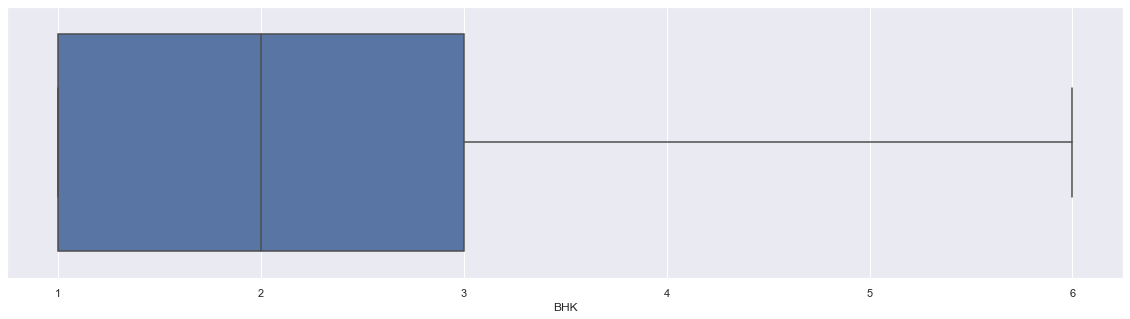

In [28]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['BHK'])

<AxesSubplot:xlabel='Rent'>

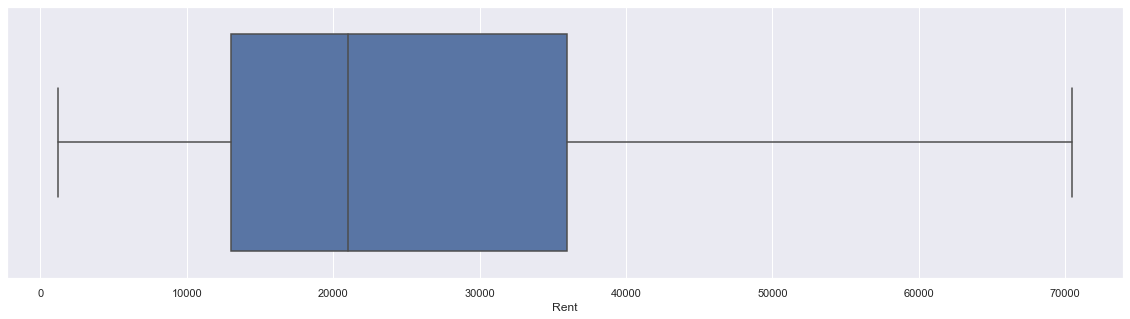

In [29]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Rent'])

<AxesSubplot:xlabel='Size'>

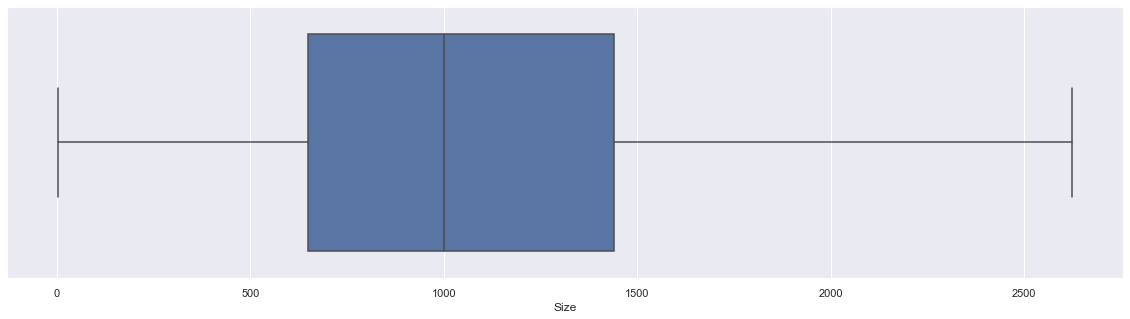

In [30]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Size'])

<AxesSubplot:xlabel='Bathroom'>

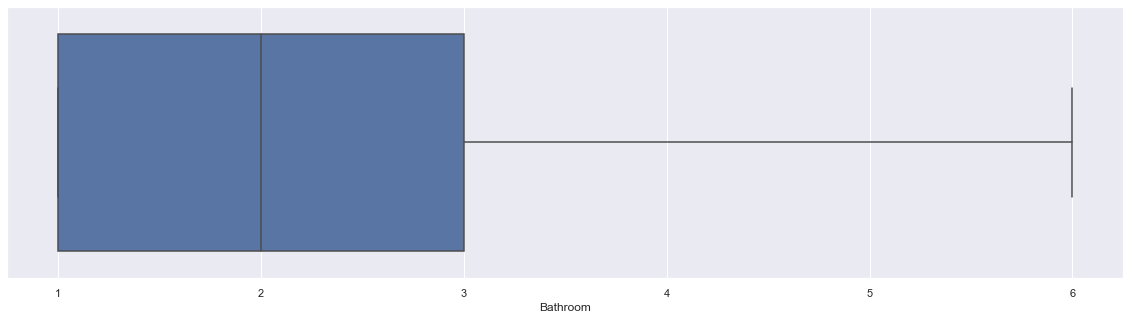

In [31]:
plt.figure(figsize = (20,5), facecolor ='white')
sns.boxplot(x = data['Bathroom'])

In [32]:
data.to_csv('clean_data.csv')

## Feature Engineering

In [33]:
encoder = LabelEncoder()

In [34]:
column_transform = make_column_transformer((OneHotEncoder(sparse=False),
                                            ['area', 'Area Type', 'City', 
                                             'Furnishing Status']), remainder='passthrough')

## Separating Dependent and Indepent Features

In [35]:
x = data.drop(columns = ['Rent'])
y = data['Rent']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
print(x_train.shape)
print(x_test.shape)

(154408, 7)
(38603, 7)


## Model Building

### Linear Regression

In [38]:
scaler = StandardScaler()

In [39]:
lr = LinearRegression()

In [40]:
pipe = make_pipeline(column_transform, scaler, lr)

In [41]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [42]:
y_pred = pipe.predict(x_test)

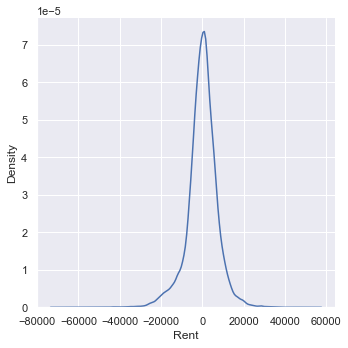

In [43]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Linear Regression

Text(0, 0.5, 'Test Predicted data')

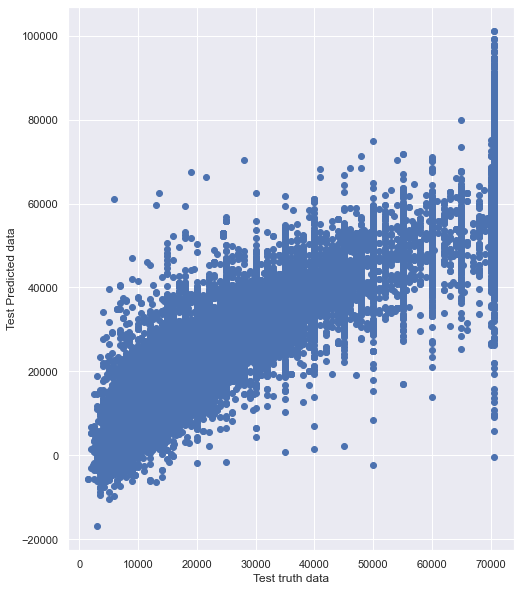

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [45]:
residual = y_test - y_pred

In [46]:
residual

122475    13003.373284
130509    25311.998284
56089     -2421.251716
101206     9056.873284
63879     -5711.251716
              ...     
94766      6563.123284
147958    -1802.376716
183784      348.873284
4061      -4636.251716
166760      314.498284
Name: Rent, Length: 38603, dtype: float64

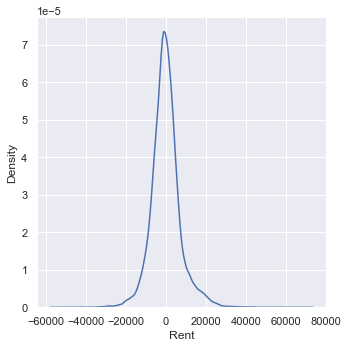

In [47]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

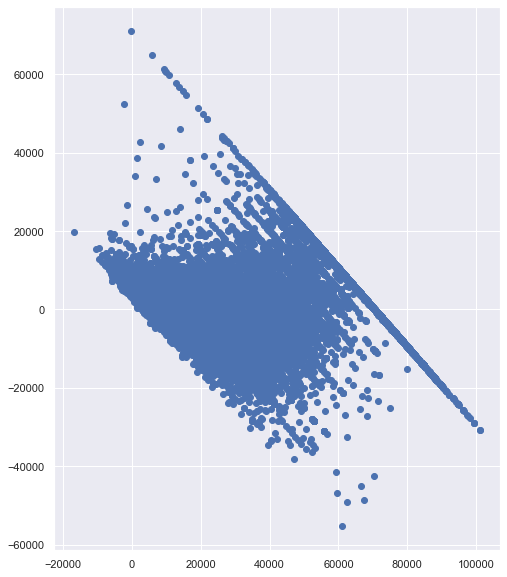

In [48]:
plt.scatter(y_pred, residual)

In [49]:
r2_score(y_test, y_pred)

0.8644195742306932

In [50]:
pipe.score(x_train, y_train)

0.8670394958986708

In [51]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 54480110.28510296
MAE 5249.297263202892


### Lasso Regression

In [52]:
ls = Lasso()

In [53]:
pipe = make_pipeline(column_transform, scaler, ls)

In [54]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [55]:
y_pred = pipe.predict(x_test)

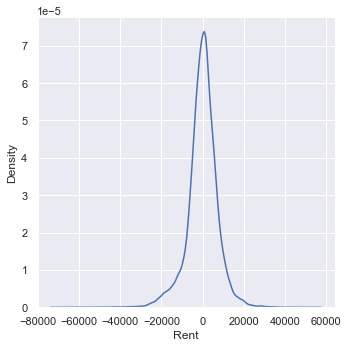

In [56]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Lasso Regression

Text(0, 0.5, 'Test Predicted data')

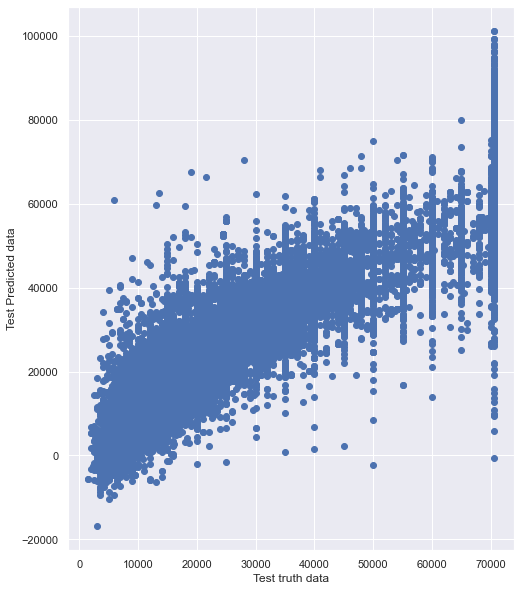

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [58]:
residual = y_test - y_pred

In [59]:
residual

122475    13011.136291
130509    25344.973779
56089     -2390.453929
101206     9094.034628
63879     -5732.613759
              ...     
94766      6549.587180
147958    -1797.200341
183784      337.680162
4061      -4633.748046
166760      303.375716
Name: Rent, Length: 38603, dtype: float64

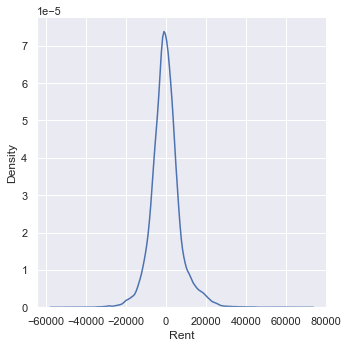

In [60]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

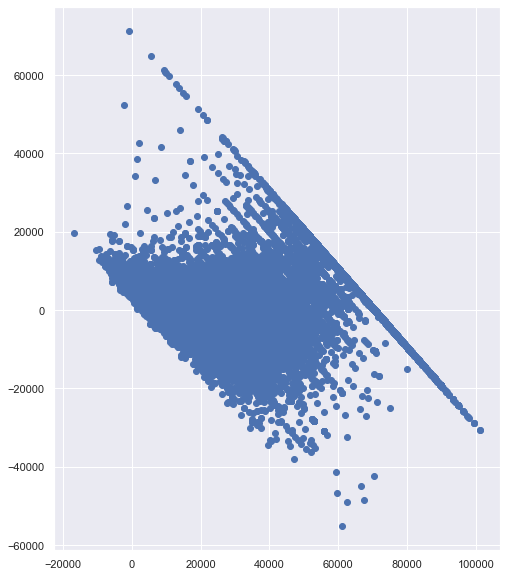

In [61]:
plt.scatter(y_pred, residual)

In [62]:
r2_score(y_test, y_pred)

0.8644271950579459

In [63]:
pipe.score(x_train, y_train)

0.867035813068675

In [64]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 54477048.0177673
MAE 5248.188141972979


### Ridge Regression

In [65]:
Rd = Ridge()

In [66]:
pipe = make_pipeline(column_transform, scaler, Rd)

In [67]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [68]:
y_pred = pipe.predict(x_test)

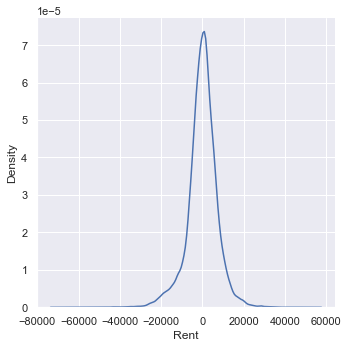

In [69]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption Ridge regression

Text(0, 0.5, 'Test Predicted data')

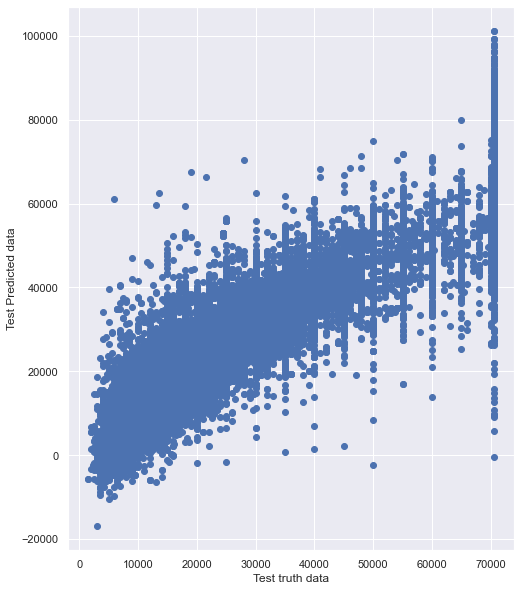

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [71]:
residual = y_test - y_pred

In [72]:
residual

122475    13012.837496
130509    25328.424907
56089     -2411.327280
101206     9069.093375
63879     -5701.665824
              ...     
94766      6584.316506
147958    -1796.520379
183784      359.324123
4061      -4624.108286
166760      315.119352
Name: Rent, Length: 38603, dtype: float64

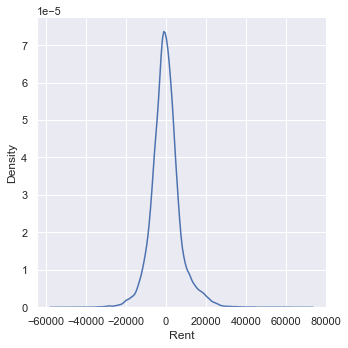

In [73]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

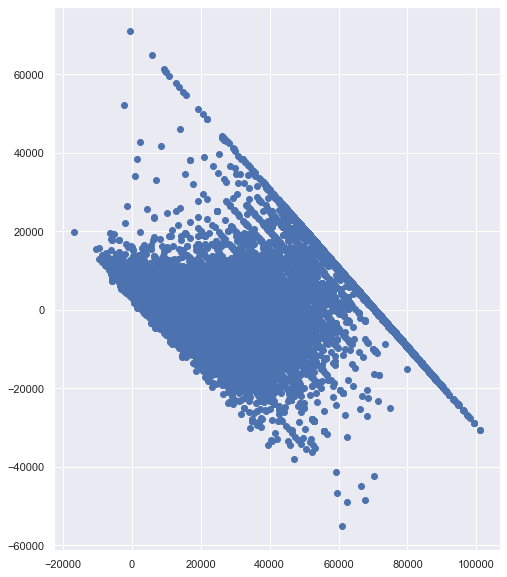

In [74]:
plt.scatter(y_pred, residual)

In [75]:
r2_score(y_test, y_pred)

0.8644200851668526

In [76]:
pipe.score(x_train, y_train)

0.867042857768478

In [77]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 54479904.97627496
MAE 5248.901575619395


### ElasticNET Regression

In [78]:
els = ElasticNet()

In [79]:
pipe = make_pipeline(column_transform, scaler, els)

In [80]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [81]:
y_pred = pipe.predict(x_test)

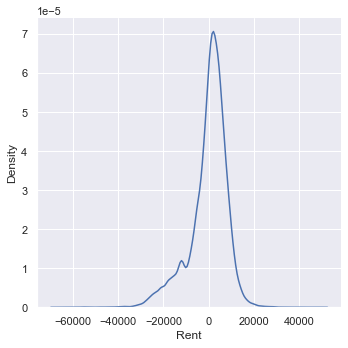

In [82]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of ElasticNet Regression

Text(0, 0.5, 'Test Predicted data')

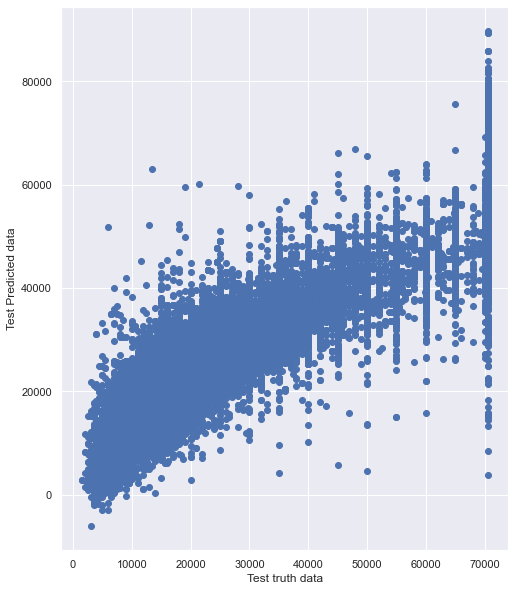

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [84]:
residual = y_test - y_pred

In [85]:
residual

122475    20221.908695
130509    28473.760242
56089      3979.629766
101206    11892.252155
63879     -9754.861841
              ...     
94766      3156.947943
147958    -2624.954915
183784    -3256.468336
4061      -9259.497544
166760    -2367.201741
Name: Rent, Length: 38603, dtype: float64

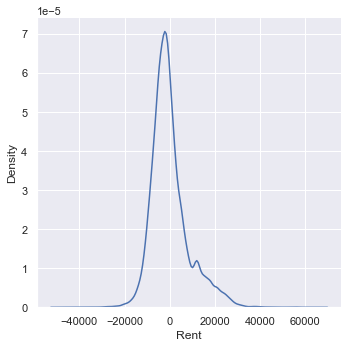

In [86]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

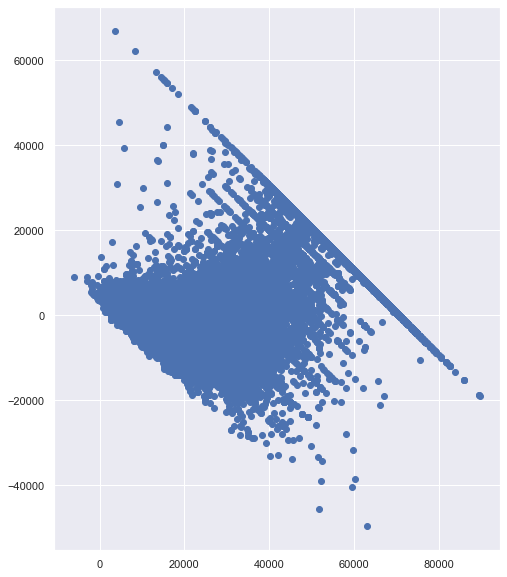

In [87]:
plt.scatter(y_pred, residual)

In [88]:
r2_score(y_test, y_pred)

0.8233100189600343

In [89]:
pipe.score(x_train, y_train)

0.8254741565491146

In [90]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 70999110.66593853
MAE 6127.989139851881


### Random Forest Regression

In [91]:
rr = RandomForestRegressor()

In [92]:
piperr = make_pipeline(column_transform, scaler, rr)

In [93]:
piperr.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [94]:
y_pred = piperr.predict(x_test)

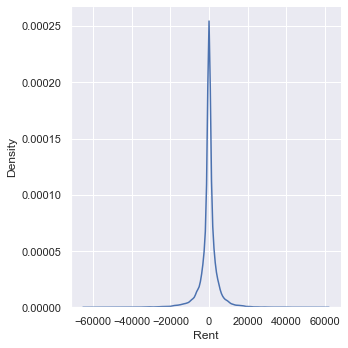

In [95]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Random Forest Regressor

Text(0, 0.5, 'Test Predicted data')

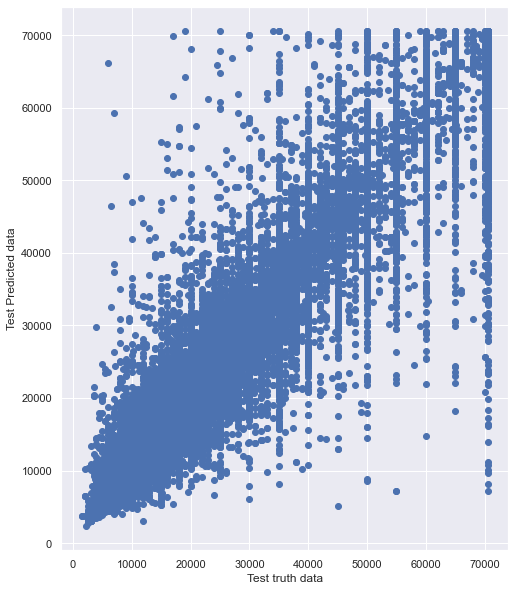

In [96]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [97]:
residual = y_test - y_pred

In [98]:
residual

122475    10601.380952
130509    -1984.941558
56089       465.000000
101206     7931.484848
63879     -3051.805556
              ...     
94766      1818.250000
147958      231.810869
183784    -1608.551587
4061      -1149.531310
166760     3652.826949
Name: Rent, Length: 38603, dtype: float64

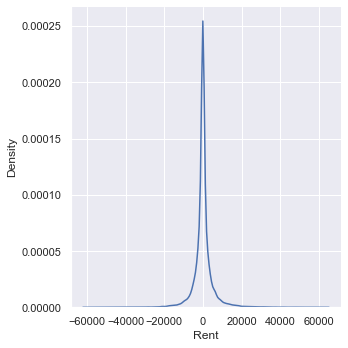

In [99]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

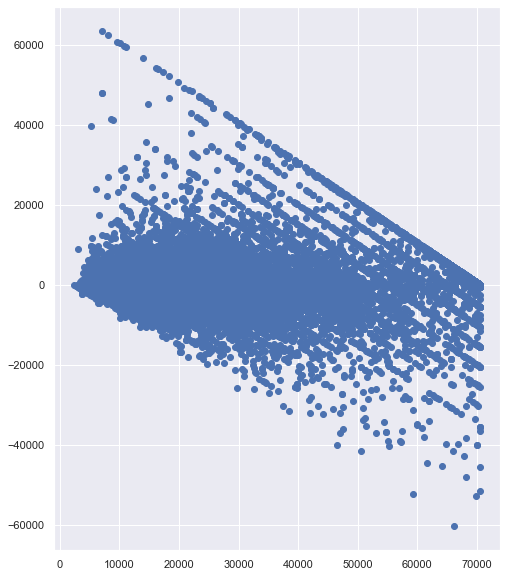

In [100]:
plt.scatter(y_pred, residual)

In [101]:
r2_score(y_test, y_pred)

0.927749913040277

In [102]:
piperr.score(x_train, y_train)

0.9753791662737201

In [103]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 29032160.67761514
MAE 2766.184879199356


### Decision Tree Regression

In [104]:
dt = DecisionTreeRegressor()

In [105]:
pipe = make_pipeline(column_transform, scaler, dt)

In [106]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [107]:
y_pred = pipe.predict(x_test)

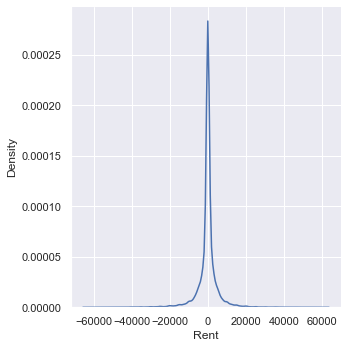

In [108]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Decision Tree Regressor

Text(0, 0.5, 'Test Predicted data')

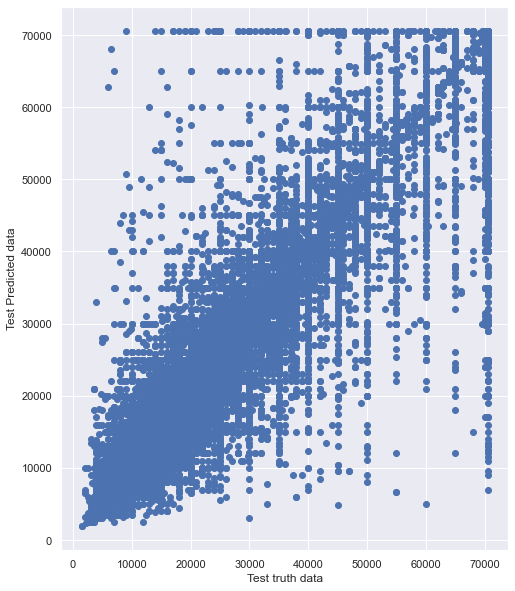

In [109]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [110]:
residual = y_test - y_pred

In [111]:
residual

122475    10500.000000
130509    -2200.000000
56089         0.000000
101206    16000.000000
63879     -3000.000000
              ...     
94766      2000.000000
147958      217.391304
183784    -3000.000000
4061       -800.000000
166760     3729.166667
Name: Rent, Length: 38603, dtype: float64

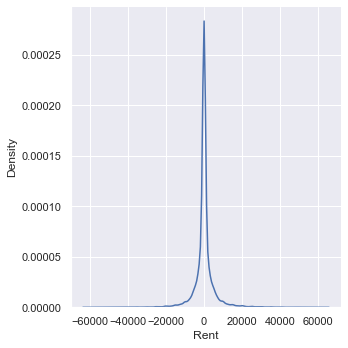

In [112]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

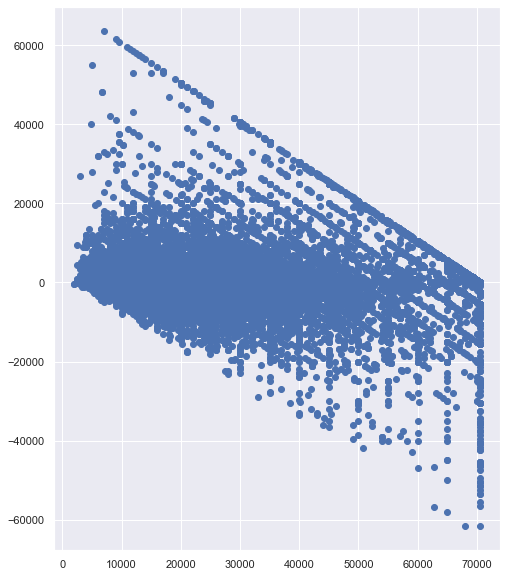

In [113]:
plt.scatter(y_pred, residual)

In [114]:
r2_score(y_test, y_pred)

0.9122661911895494

In [115]:
pipe.score(x_train, y_train)

0.9816845145525591

In [116]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 35253964.962894686
MAE 2751.9067307683517


### XGBOOST Regression

In [117]:
xg = XGBRegressor()

In [118]:
pipe_xg = make_pipeline(column_transform, scaler, xg)

In [119]:
pipe_xg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_b...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_thr

In [120]:
y_pred = pipe_xg.predict(x_test)

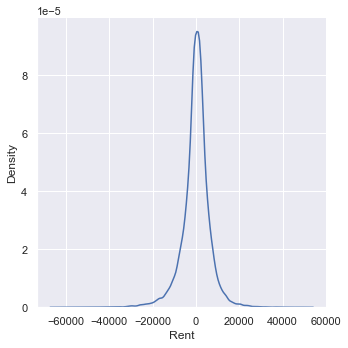

In [121]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of XGBoost Regressor

Text(0, 0.5, 'Test Predicted data')

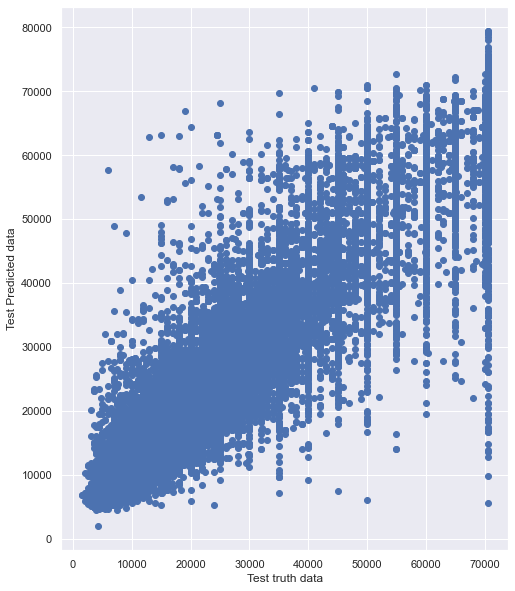

In [122]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [123]:
residual = y_test - y_pred

In [124]:
residual

122475     7325.519531
130509    22897.640625
56089      3090.859375
101206    13989.162109
63879     -4765.783203
              ...     
94766       671.265625
147958     3039.000000
183784    -1831.651367
4061      -3287.533203
166760     1862.880859
Name: Rent, Length: 38603, dtype: float64

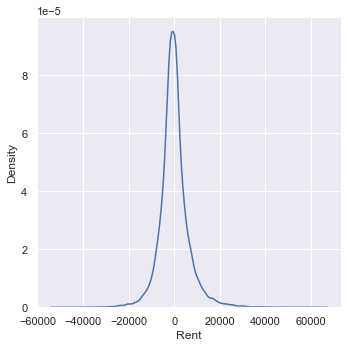

In [125]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

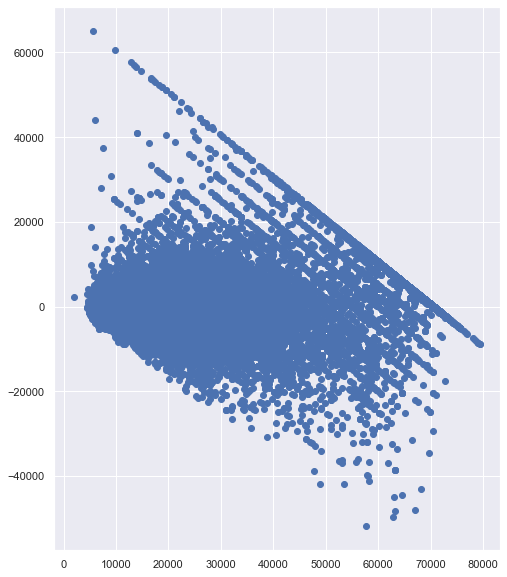

In [126]:
plt.scatter(y_pred, residual)

In [127]:
r2_score(y_test, y_pred)

0.8907924264196737

In [128]:
pipe_xg.score(x_train, y_train)

0.8964742370730723

In [129]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 43882740.58637432
MAE 4444.6139625865735


### Gradient Boosting Regression

In [130]:
gb = GradientBoostingRegressor()

In [131]:
pipe = make_pipeline(column_transform, scaler, gb)

In [132]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [133]:
y_pred = pipe.predict(x_test)

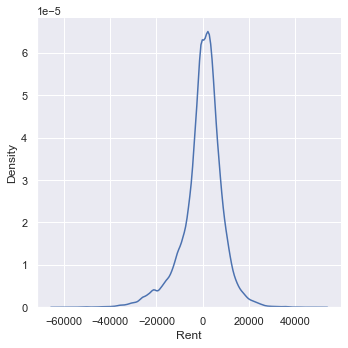

In [134]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption Gradient Boosting Regressor

Text(0, 0.5, 'Test Predicted data')

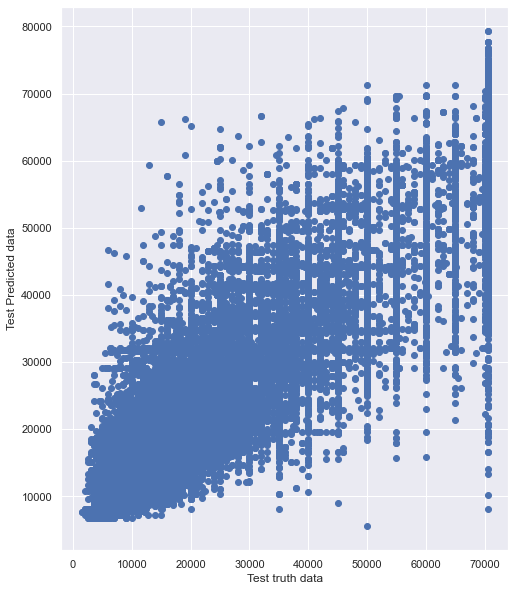

In [135]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [136]:
residual = y_test - y_pred

In [137]:
residual

122475    10316.458987
130509    26770.174466
56089      3538.733812
101206    15691.744903
63879     -8255.676434
              ...     
94766     -1837.294730
147958     1874.728863
183784    -3376.693439
4061      -7866.927094
166760     -438.547544
Name: Rent, Length: 38603, dtype: float64

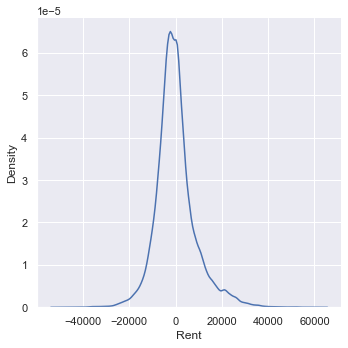

In [138]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

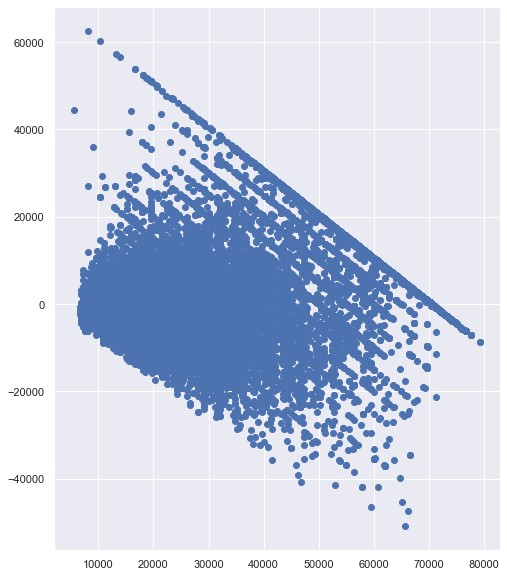

In [139]:
plt.scatter(y_pred, residual)

In [140]:
r2_score(y_test, y_pred)

0.8107232648539879

In [141]:
pipe.score(x_train, y_train)

0.8114202247300919

In [142]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 76056830.08183464
MAE 6192.123896045962


### Ada Boost Regression

In [143]:
ada = AdaBoostRegressor()

In [144]:
pipe = make_pipeline(column_transform, scaler, ada)

In [145]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['area', 'Area Type', 'City',
                                                   'Furnishing Status'])])),
                ('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor())])

In [146]:
y_pred = pipe.predict(x_test)

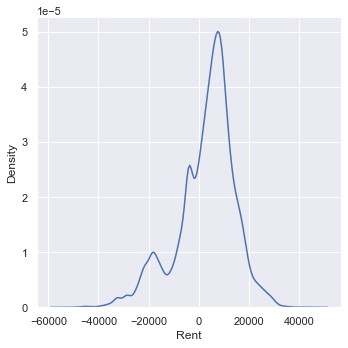

In [147]:
sns.displot(y_pred-y_test, kind = 'kde')

### Assumption of Ada Boost Regressor

Text(0, 0.5, 'Test Predicted data')

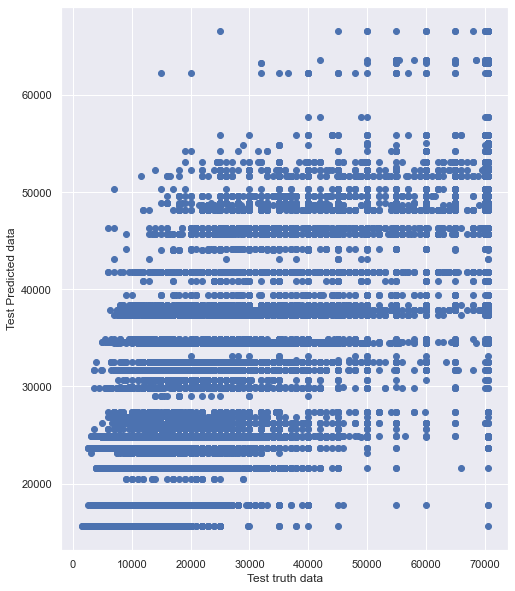

In [148]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test Predicted data')

### Residual

In [149]:
residual = y_test - y_pred

In [150]:
residual

122475    18265.512742
130509    26227.150800
56089      8249.739661
101206    10574.874901
63879     -8819.724983
              ...     
94766     -8195.804291
147958    -6662.706084
183784    -7606.662551
4061     -19031.703230
166760    -8328.310263
Name: Rent, Length: 38603, dtype: float64

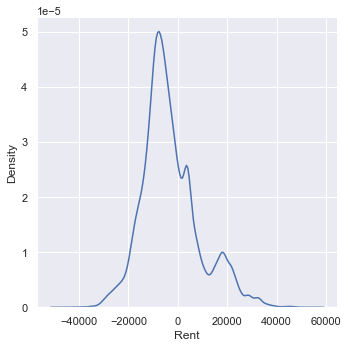

In [151]:
sns.displot(residual, kind = 'kde')

### Scatter Plot with Residual and Prediction

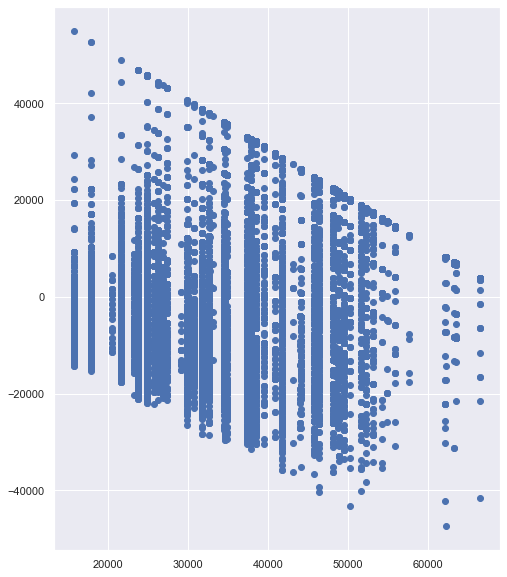

In [152]:
plt.scatter(y_pred, residual)

In [153]:
r2_score(y_test, y_pred)

0.6393410632067063

In [154]:
pipe.score(x_train, y_train)

0.6361923996254066

In [155]:
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 144923122.4958638
MAE 9711.61855124108


#### Random Forest Regression is Best Model so for with R2 Score of 92.7%

In [156]:
# Dumping Model
import pickle

In [157]:
pickle.dump(piperr, open('RandomForestModel.pkl', 'wb'))